# expected-shortfall-unconditional-test-acerbi-szekely

`Python` implementation of the Direct Expected Shortfall Test of [Acerbi and Szekely (2014)](https://www.msci.com/documents/10199/22aa9922-f874-4060-b77a-0f0e267a489b) by Lluc Puig Codina

In [10]:
import numpy as np
import scipy.stats as stats
from EStest import EStest

## Input

In [11]:
print(EStest.__init__.__doc__)

        
        X_obs (np.array): Numpy array of size 1xT containing the actual 
                          realization of the portfolio return.
                          
        X (function): Function that simulates (outputs) a realization of the 
                      portfolio return under H0: 
                      X^s = (X_1^s, X_2^s,..., X_T^s), with X_t^s ~ P_t for all
                      t = 1 to T.
                      Output should be a numpy array of 1xT.
                      
        VaRLevel (float): Number describing the level of the VaR, say 0.05 for 
                          95% or 0.01 for 99%.
        
        VaR (np.array): Numpy array of size 1xT containing the projected 
                        Value-at-Risk estimates for t = 1 to T at VarLevel.
                        VaR must not be reported in its positive values, but
                        rather in its actual values, usually negative.
                        
        ES (np.array): Numpy array of size 

## Examples

We run the test under two different scenarios. In the first scenario the portfolio returns are generated from a normal distribution mixture such that there is a bump in the left tail compared to a normal distribution. In the second case the portfolio returns are generated form a normal.

Then returns are always assumed to follow a normal distribution with the sample mean and variance. We can observe that the Value at Risk and Expected Shortfall estimates at 95% are strongly rejected in the first case but not in the second case.

### Test 1
$$
TDGP: r_t \sim \ \ \text{i.i.d} \ \ \mathbb{1}\{\phi_t = 0\} \mathcal{N}(\mu_{standard}, \sigma_{stress}) + \mathbb{1}\{\phi_t = 1\} \mathcal{N}(\mu_{stress}, \sigma_{stress})
$$
where $\phi_t \sim$ i.i.d $Bernoulli(p)$.

$$
Model: r_t \sim \ \ \text{i.i.d} \ \ \mathcal{N}(\hat{\mu}, \hat{\sigma})
$$

In [12]:
np.random.seed(0) #Fix the seed for reproducible results

T = 3000 #Sample size of three thousand
r = 0.05 #VaRLevel
p_stress = 0.03 #Stress scenario probability
standard_mu  = 0.03 #mean for standard times
standard_sigma = 0.1 #standard deviation for standard times
stress_mu  = -0.32 #mean for stress times
stress_sigma = 0.03 #standard deviation for stress times

u =np.random.binomial(size=T, n=1, p= p_stress) #Stress indicator
standard = np.random.normal(loc = standard_mu, scale = standard_sigma, size = T) #PnL under standard times
stress =  np.random.normal(loc = stress_mu, scale = stress_sigma, size = T) #PnL under stress times
x = (np.ones(T)-u)*standard + u*stress #PnL realization

#Simulation of returns from the assumed normal distribution
sample_mu = np.mean(x)
sample_sigma = np.std(x)
def sim_returns(): return np.random.normal(loc = sample_mu, scale = sample_sigma, size = T) 

#Value-at-Risk estimates
k = np.repeat(stats.norm.ppf(r, loc = sample_mu, scale = sample_sigma), T)

#Expected Shortfall estimates
z = stats.norm.ppf(r, loc = sample_mu, scale = sample_sigma) #Estimated VaR
z = (z-sample_mu)/sample_sigma #Normalized VaR
z = sample_mu - sample_sigma*(stats.norm.pdf(z)/stats.norm.cdf(z)) #Estimated ES
z = np.repeat(z ,T) #ES projections
#The procedure to compute the ES under a normal distribution can be obtained
#here: https://stats.stackexchange.com/questions/166273/expected-value-of-x-in-a-normal-distribution-given-that-it-is-below-a-certain-v

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


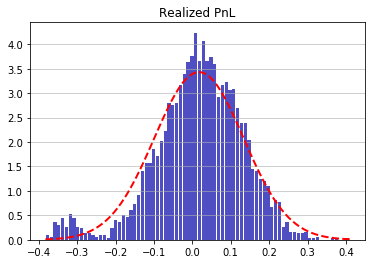

In [13]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(x, bins=80, density = True, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

y = mlab.normpdf(bins, sample_mu, sample_sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.grid(axis='y', alpha=0.75)
plt.title('Realized PnL')
plt.show()

In [14]:
test1 = EStest(X_obs = x, X = sim_returns, VaRLevel = r, VaR = k, ES = z, nSim = 100000)
test1.print()

----------------------------------------------------------------
   Direct/Unconditional Expected Shortfall Test by Simulation   
----------------------------------------------------------------
Number of observations: 3000
Number of VaR breaches: 156
Expected number of VaR breaches: 150.0
ES Statistic: -0.29866795648622135
Expected ES Statistic under the null hypothesis: 0
Critical Value at α = 0.05: -0.13457639121094353
p-value: 0.00018
Number of Monte Carlo simulations: 100000
----------------------------------------------------------------


### Test 2

$$
TDGP: r_t \sim \ \ \text{i.i.d} \ \ \mathcal{N}(\mu_{standard}, \sigma_{standard})
$$

$$
Model: r_t \sim \ \ \text{i.i.d} \ \ \mathcal{N}(\hat{\mu}, \hat{\sigma})
$$

In [15]:
#Simulation of returns from the assumed normal distribution
sample_mu = np.mean(standard)
sample_sigma = np.std(standard)
def sim_returns(): return np.random.normal(loc = sample_mu, scale = sample_sigma, size = T) 

#Value-at-Risk estimates
k = np.repeat(stats.norm.ppf(r, loc = sample_mu, scale = sample_sigma), T)

#Expected Shortfall estimates
z = stats.norm.ppf(r, loc = sample_mu, scale = sample_sigma) #Estimated VaR
z = (z-sample_mu)/sample_sigma #Normalized VaR
z = sample_mu - sample_sigma*(stats.norm.pdf(z)/stats.norm.cdf(z)) #Estimated ES
z = np.repeat(z ,T) #ES projections

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


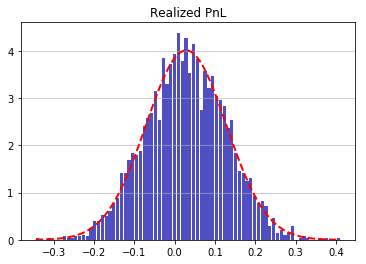

In [16]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(standard, bins=80, density = True, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

y = mlab.normpdf(bins, sample_mu, sample_sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.grid(axis='y', alpha=0.75)
plt.title('Realized PnL')
plt.show()

In [17]:
test1 = EStest(X_obs = standard, X = sim_returns, VaRLevel = r, VaR = k, ES = z, nSim = 100000)
test1.print()

----------------------------------------------------------------
   Direct/Unconditional Expected Shortfall Test by Simulation   
----------------------------------------------------------------
Number of observations: 3000
Number of VaR breaches: 144
Expected number of VaR breaches: 150.0
ES Statistic: 0.05483829919134353
Expected ES Statistic under the null hypothesis: 0
Critical Value at α = 0.05: -0.13637369487936757
p-value: 0.74721
Number of Monte Carlo simulations: 100000
----------------------------------------------------------------


## References

Acerbi, Carlo, and Balazs Szekely. "Back-testing expected shortfall." *Risk* 27.11 (2014): 76-81.